### 地理数据坐标系统可视化（Cartopy）


In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


投影坐标系可视化

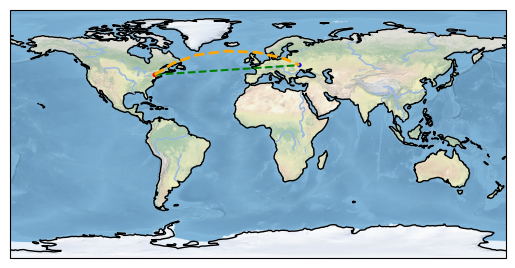

In [3]:
fig = plt.figure()
### 需用add_subplot(), 用add_axes()不能设置projection参数。
proj = ccrs.PlateCarree()     ### platecarree为等距圆柱投影。该坐标系与地理坐标系近似, 因此可以用经纬度在地图上表示位置。
ax = fig.add_subplot(projection=proj)   
ax.set_extent([-180, 180, -90, 90], crs=proj)
ax.stock_img()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

## 绘制路径
lon1, lat1 = -75, 43
lon2, lat2 = 30, 50
ax.scatter([lon1, lon2], [lat1,lat2], s=20, color=['red', 'blue'], marker='.')
ax.plot([lon1, lon2], [lat1,lat2], '--g')
ax.plot([lon1, lon2], [lat1,lat2], '--', color='orange', linewidth=2, transform=ccrs.Geodetic())



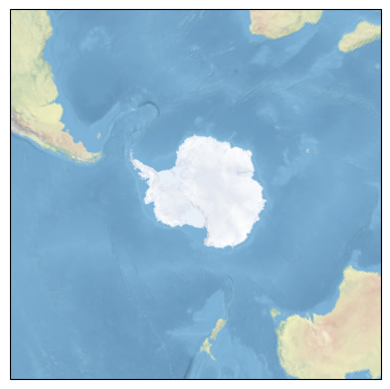

In [14]:
import numpy as np
import matplotlib.path as mpath

proj2 = ccrs.Mercator()
proj3 = ccrs.Mollweide(central_longitude=90)
proj4 = ccrs.SouthPolarStereo(central_longitude=0)
ax = plt.subplot(111, projection=proj4)
ax.set_extent([-180, 180, -90, -30], crs=proj)

ax.stock_img()
ax.grid()



刻度设置

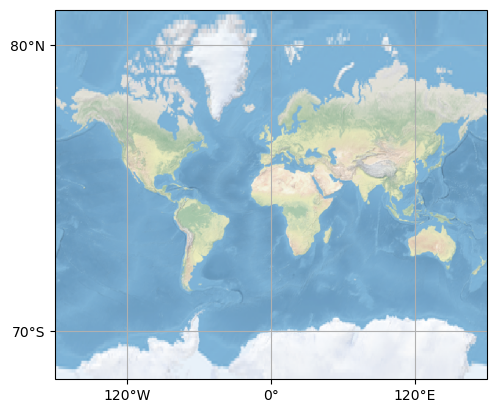

In [184]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
proj = ccrs.Mercator()
proj1 = ccrs.PlateCarree(central_longitude=0)
ax = plt.subplot(111, projection=proj)
ax.stock_img()
ax.set_xticks([-120, 0, 120], crs=proj1)   ## range of x: [-180,-180], not [0, 360] 
ax.set_yticks([-70, 80], crs=proj1)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.grid()


投影变形显示

/Users/luo/miniconda3/envs/venv/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:799: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '


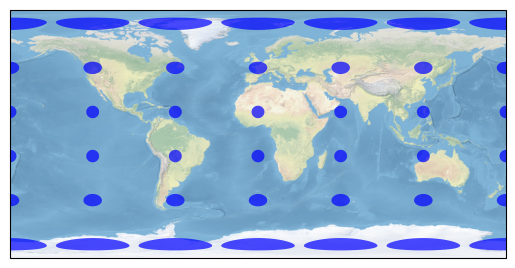

In [183]:
proj = ccrs.PlateCarree(central_longitude=0)
# proj = ccrs.Mollweide(central_longitude=90)
ax = plt.subplot(111, projection=proj)
ax.stock_img()
ax.tissot(facecolor='blue', alpha=0.7);


添加外部地理要素

In [69]:
from cartopy.io.shapereader import Reader  
from cartopy.feature import ShapelyFeature 
import rasterio


In [67]:
path_vec = 'data/data-base/vector/China-Province/province.shp'
path_vec = 'data/data-section-4/province_reproject2utm48_qgis.shp'
path_raster = 'data/data-section-4/rsimg_reproj2utm45_gdal.tif'


EPSG:32645


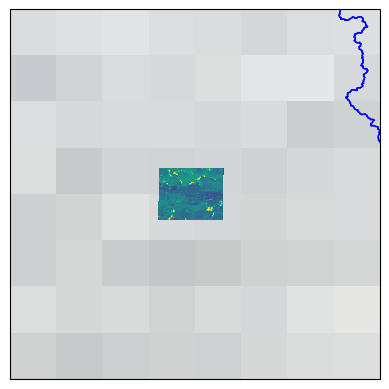

In [109]:
proj_utm48=ccrs.UTM(zone=48, southern_hemisphere=False)
proj_utm45=ccrs.UTM(zone=45, southern_hemisphere=False)
## read shp file
cshp = Reader(path_vec).geometries()
## convert shp file to cfeature
shp_feature = ShapelyFeature(cshp, crs=proj_utm48)
ax = plt.subplot(111, projection=proj)
ax.set_extent([40, 150, -20, 90], crs=proj)
ax.set_extent([86, 90, 31, 35], crs=proj)
ax.stock_img()
ax.add_feature(shp_feature, facecolor='none', edgecolor='blue')
## 显示遥感栅格影像
with rasterio.open(path_raster) as rsimg:
    rsimg_arr = rsimg.read(1)
    rsimg_crs = rsimg.crs
    left, bottom, right, top = rsimg.bounds
print(rsimg_crs)
ax.imshow(rsimg_arr, vmax=3000, vmin=0, transform=proj_utm45, extent=(left, right, bottom, top))

